<a href="https://colab.research.google.com/github/hannesstuehrenberg/Probabilistic-Machine-Learning_lecture-PROJECTS/blob/main/projects/08-1SHXXXX_football_analytics/notebooks/03_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3. Data Preprocessing
- Steps taken to clean or transform the data


In [ ]:
!pip install mplsoccer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 kB 2.3 MB/s eta 0:00:00


In [39]:
#Import necessary libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import VerticalPitch
from mplsoccer import Sbopen
from tqdm import tqdm

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Initialize parser
parser = Sbopen()

In [26]:
matches_df = parser.match(competition_id=72, season_id=107)
match_ids = matches_df['match_id'].tolist()

all_shots = []

for match_id in match_ids:
    df_event, df_related, df_freeze, df_tactics = parser.event(match_id)

    df_shots = df_event[df_event['type_name'] == 'Shot'].copy()

    df_shots['match_id'] = match_id

    all_shots.append(df_shots)

shots_master_women_world_cup_df = pd.concat(all_shots, ignore_index=True)

In [28]:
#Lets look at the example dataset from the Women's World Cup 2023 again. It consisted of 1680 shots. 184 of them were goals.
num_goals = shots_master_women_world_cup_df[shots_master_women_world_cup_df['outcome_name'] == 'Goal'].shape[0]
print(f"Number of goals: {num_goals}")


Number of goals: 184


In [ ]:
#As many more competitions are available the next step is to create a shots_master_df for all shots from all competitions to enrich the dataset on which to train the models later.

#During data loading and exploration these columns were discovered to always be NaN for type_name = Shot. Therefore, they are not of interest for the shots_master_df
irrelevant_columns = [
    'tactics_formation', 'pass_recipient_id', 'pass_recipient_name', 'pass_length',
    'pass_angle', 'pass_height_id', 'pass_height_name', 'counterpress', 'pass_switch',
    'block_deflection', 'pass_cross', 'pass_assisted_shot_id', 'pass_shot_assist',
    'goalkeeper_position_id', 'goalkeeper_position_name', 'foul_committed_card_id',
    'foul_committed_card_name', 'ball_recovery_recovery_failure', 'foul_committed_advantage',
    'foul_won_advantage', 'foul_won_defensive', 'dribble_nutmeg', 'pass_goal_assist',
    'substitution_replacement_id', 'substitution_replacement_name', 'bad_behaviour_card_id',
    'bad_behaviour_card_name', 'pass_cut_back', 'dribble_overrun', 'ball_recovery_offensive',
    'pass_no_touch', 'pass_deflected', 'foul_committed_penalty', 'foul_won_penalty',
    'injury_stoppage_in_chain', 'foul_committed_offensive', 'block_offensive',
    'pass_miscommunication', 'block_save_block', 'dribble_no_touch', 'player_off_permanent'
]

all_shots = []

df_competitions = parser.competition()

# Add mininterval or miniters to slow down tqdm output
for _, row in tqdm(df_competitions.iterrows(), total=len(df_competitions), desc="Competitions", mininterval=2.0):
    comp_id = row['competition_id']
    season_id = row['season_id']
    comp_name = row['competition_name']
    season_name = row['season_name']

    tqdm.write(f"\n🔄 Processing {comp_name} - {season_name}...")

    try:
        matches_df = parser.match(competition_id=comp_id, season_id=season_id)
        match_ids = matches_df['match_id'].tolist()

        for match_id in tqdm(
            match_ids,
            desc=f"  Matches in {comp_name[:15]} {season_name}",
            leave=False,
            mininterval=20,
        ):
            try:
                df_event, df_related, df_freeze, df_tactics = parser.event(match_id)
                df_shots = df_event[df_event['type_name'] == 'Shot'].copy()
                df_shots['match_id'] = match_id
                all_shots.append(df_shots)
            except Exception as e:
                print(f"     ❌ Error in match_id {match_id}: {e}")

    except Exception as e:
        print(f"❌ Could not fetch matches for {comp_name} - {season_name}: {e}")

shots_master_df = pd.concat(all_shots, ignore_index=True)
shots_master_df = shots_master_df.drop(columns=[col for col in irrelevant_columns if col in shots_master_df.columns])

print("\n✅ All done!")
print("📊 Final shape of shots_master_df:", shots_master_df.shape)


Competitions:   0%|          | 0/74 [00:00<?, ?it/s]


🔄 Processing 1. Bundesliga - 2023/2024...



Competitions:   1%|▏         | 1/74 [00:22<26:59, 22.19s/it]


🔄 Processing 1. Bundesliga - 2015/2016...



Competitions:   3%|▎         | 2/74 [03:36<2:27:54, 123.26s/it]


🔄 Processing African Cup of Nations - 2023...



Competitions:   4%|▍         | 3/74 [04:13<1:39:14, 83.86s/it]


🔄 Processing Champions League - 2018/2019...



Competitions:   4%|▍         | 3/74 [04:14<1:39:14, 83.86s/it]


🔄 Processing Champions League - 2017/2018...



Competitions:   7%|▋         | 5/74 [04:15<42:33, 37.00s/it]


🔄 Processing Champions League - 2016/2017...



Competitions:   7%|▋         | 5/74 [04:16<42:33, 37.00s/it]


🔄 Processing Champions League - 2015/2016...



Competitions:   7%|▋         | 5/74 [04:17<42:33, 37.00s/it]


🔄 Processing Champions League - 2014/2015...



Competitions:  11%|█         | 8/74 [04:18<18:56, 17.21s/it]


🔄 Processing Champions League - 2013/2014...



Competitions:  11%|█         | 8/74 [04:18<18:56, 17.21s/it]


🔄 Processing Champions League - 2012/2013...



Competitions:  11%|█         | 8/74 [04:19<18:56, 17.21s/it]


🔄 Processing Champions League - 2011/2012...



Competitions:  15%|█▍        | 11/74 [04:20<10:31, 10.03s/it]


🔄 Processing Champions League - 2010/2011...



Competitions:  15%|█▍        | 11/74 [04:21<10:31, 10.03s/it]


🔄 Processing Champions League - 2009/2010...



Competitions:  15%|█▍        | 11/74 [04:22<10:31, 10.03s/it]


🔄 Processing Champions League - 2008/2009...



Competitions:  19%|█▉        | 14/74 [04:23<06:30,  6.50s/it]


🔄 Processing Champions League - 2006/2007...



Competitions:  19%|█▉        | 14/74 [04:24<06:30,  6.50s/it]


🔄 Processing Champions League - 2004/2005...



Competitions:  19%|█▉        | 14/74 [04:25<06:30,  6.50s/it]


🔄 Processing Champions League - 2003/2004...



Competitions:  23%|██▎       | 17/74 [04:26<04:18,  4.54s/it]


🔄 Processing Champions League - 1999/2000...



Competitions:  23%|██▎       | 17/74 [04:27<04:18,  4.54s/it]


🔄 Processing Champions League - 1972/1973...



Competitions:  23%|██▎       | 17/74 [04:28<04:18,  4.54s/it]


🔄 Processing Champions League - 1971/1972...



Competitions:  27%|██▋       | 20/74 [04:29<02:59,  3.33s/it]


🔄 Processing Champions League - 1970/1971...



Competitions:  27%|██▋       | 20/74 [04:29<02:59,  3.33s/it]


🔄 Processing Copa America - 2024...



Competitions:  30%|██▉       | 22/74 [04:52<04:38,  5.35s/it]


🔄 Processing Copa del Rey - 1983/1984...



Competitions:  30%|██▉       | 22/74 [04:53<04:38,  5.35s/it]


🔄 Processing Copa del Rey - 1982/1983...



Competitions:  30%|██▉       | 22/74 [04:54<04:38,  5.35s/it]


🔄 Processing Copa del Rey - 1977/1978...



Competitions:  34%|███▍      | 25/74 [04:54<03:06,  3.81s/it]


🔄 Processing FA Women's Super League - 2020/2021...



Competitions:  35%|███▌      | 26/74 [06:29<13:10, 16.47s/it]


🔄 Processing FA Women's Super League - 2019/2020...



Competitions:  36%|███▋      | 27/74 [07:34<19:14, 24.57s/it]


🔄 Processing FA Women's Super League - 2018/2019...



Competitions:  38%|███▊      | 28/74 [08:51<26:38, 34.74s/it]


🔄 Processing FIFA U20 World Cup - 1979...



Competitions:  38%|███▊      | 28/74 [08:52<26:38, 34.74s/it]


🔄 Processing FIFA World Cup - 2022...



Competitions:  41%|████      | 30/74 [09:41<22:53, 31.22s/it]


🔄 Processing FIFA World Cup - 2018...



Competitions:  42%|████▏     | 31/74 [10:28<24:41, 34.46s/it]


🔄 Processing FIFA World Cup - 1990...



Competitions:  42%|████▏     | 31/74 [10:29<24:41, 34.46s/it]


🔄 Processing FIFA World Cup - 1986...



Competitions:  45%|████▍     | 33/74 [10:31<15:20, 22.45s/it]


🔄 Processing FIFA World Cup - 1974...



Competitions:  45%|████▍     | 33/74 [10:36<15:20, 22.45s/it]


🔄 Processing FIFA World Cup - 1970...



Competitions:  47%|████▋     | 35/74 [10:40<10:33, 16.25s/it]


🔄 Processing FIFA World Cup - 1962...



Competitions:  47%|████▋     | 35/74 [10:41<10:33, 16.25s/it]


🔄 Processing FIFA World Cup - 1958...



Competitions:  50%|█████     | 37/74 [10:43<07:01, 11.40s/it]


🔄 Processing Indian Super league - 2021/2022...



Competitions:  51%|█████▏    | 38/74 [12:04<14:47, 24.65s/it]


🔄 Processing La Liga - 2020/2021...



Competitions:  53%|█████▎    | 39/74 [12:33<14:55, 25.59s/it]


🔄 Processing La Liga - 2019/2020...



Competitions:  54%|█████▍    | 40/74 [13:00<14:40, 25.91s/it]


🔄 Processing La Liga - 2018/2019...



Competitions:  55%|█████▌    | 41/74 [13:27<14:26, 26.26s/it]


🔄 Processing La Liga - 2017/2018...



Competitions:  57%|█████▋    | 42/74 [13:56<14:16, 26.78s/it]


🔄 Processing La Liga - 2016/2017...



Competitions:  58%|█████▊    | 43/74 [14:21<13:40, 26.48s/it]


🔄 Processing La Liga - 2015/2016...



Competitions:  59%|█████▉    | 44/74 [19:03<49:03, 98.11s/it]


🔄 Processing La Liga - 2014/2015...



Competitions:  61%|██████    | 45/74 [19:33<37:59, 78.61s/it]


🔄 Processing La Liga - 2013/2014...



Competitions:  62%|██████▏   | 46/74 [19:58<29:26, 63.10s/it]


🔄 Processing La Liga - 2012/2013...



Competitions:  64%|██████▎   | 47/74 [20:24<23:33, 52.34s/it]


🔄 Processing La Liga - 2011/2012...



Competitions:  65%|██████▍   | 48/74 [20:55<19:53, 45.89s/it]


🔄 Processing La Liga - 2010/2011...



Competitions:  66%|██████▌   | 49/74 [21:21<16:44, 40.17s/it]


🔄 Processing La Liga - 2009/2010...



Competitions:  68%|██████▊   | 50/74 [21:47<14:23, 35.98s/it]


🔄 Processing La Liga - 2008/2009...



Competitions:  69%|██████▉   | 51/74 [22:11<12:22, 32.28s/it]


🔄 Processing La Liga - 2007/2008...



Competitions:  70%|███████   | 52/74 [22:32<10:34, 28.85s/it]


🔄 Processing La Liga - 2006/2007...



Competitions:  72%|███████▏  | 53/74 [22:52<09:08, 26.12s/it]


🔄 Processing La Liga - 2005/2006...



Competitions:  73%|███████▎  | 54/74 [23:04<07:21, 22.06s/it]


🔄 Processing La Liga - 2004/2005...



Competitions:  74%|███████▍  | 55/74 [23:09<05:23, 17.01s/it]


🔄 Processing La Liga - 1973/1974...



Competitions:  74%|███████▍  | 55/74 [23:10<05:23, 17.01s/it]


🔄 Processing Liga Profesional - 1997/1998...



Competitions:  74%|███████▍  | 55/74 [23:11<05:23, 17.01s/it]


🔄 Processing Liga Profesional - 1981...



Competitions:  78%|███████▊  | 58/74 [23:12<02:07,  7.94s/it]


🔄 Processing Ligue 1 - 2022/2023...



Competitions:  80%|███████▉  | 59/74 [23:39<02:59, 11.99s/it]


🔄 Processing Ligue 1 - 2021/2022...



Competitions:  81%|████████  | 60/74 [24:01<03:20, 14.32s/it]


🔄 Processing Ligue 1 - 2015/2016...



Competitions:  82%|████████▏ | 61/74 [28:54<18:07, 83.68s/it]


🔄 Processing Major League Soccer - 2023...



Competitions:  84%|████████▍ | 62/74 [28:59<12:36, 63.05s/it]


🔄 Processing North American League - 1977...



Competitions:  84%|████████▍ | 62/74 [29:00<12:36, 63.05s/it]


🔄 Processing NWSL - 2018...



Competitions:  86%|████████▋ | 64/74 [29:25<06:56, 41.63s/it]


🔄 Processing Premier League - 2015/2016...



Competitions:  88%|████████▊ | 65/74 [34:07<14:41, 97.96s/it]


🔄 Processing Premier League - 2003/2004...



Competitions:  89%|████████▉ | 66/74 [34:35<10:41, 80.23s/it]


🔄 Processing Serie A - 2015/2016...



Competitions:  91%|█████████ | 67/74 [39:35<16:07, 138.18s/it]


🔄 Processing Serie A - 1986/1987...



Competitions:  91%|█████████ | 67/74 [39:36<16:07, 138.18s/it]


🔄 Processing UEFA Euro - 2024...



Competitions:  93%|█████████▎| 69/74 [40:15<07:16, 87.36s/it]


🔄 Processing UEFA Euro - 2020...



Competitions:  95%|█████████▍| 70/74 [40:54<05:04, 76.04s/it]


🔄 Processing UEFA Europa League - 1988/1989...



Competitions:  96%|█████████▌| 71/74 [40:56<02:52, 57.51s/it]


🔄 Processing UEFA Women's Euro - 2022...



Competitions:  97%|█████████▋| 72/74 [41:19<01:36, 48.36s/it]


🔄 Processing Women's World Cup - 2023...



Competitions:  99%|█████████▊| 73/74 [41:58<00:45, 45.85s/it]


🔄 Processing Women's World Cup - 2019...



Competitions: 100%|██████████| 74/74 [42:36<00:00, 34.55s/it]



✅ All done!
📊 Final shape of shots_master_df: (87111, 49)


In [ ]:
#Since creating the dataset took more than 40 minutes I want to permanently safe it to a .csv, that I can always access. Before saving I reorder the columns.

ordered_columns = [
    #identifiers
    'id',
    'index',
    'match_id',

    #time information
    'period',
    'timestamp',

    #team and player columns
    'team_id',
    'team_name',
    'player_id',
    'player_name',
    'position_id',
    'position_name',

    #location columns
    'x',
    'y',
    'end_x',
    'end_y',
    'end_z',

    #shot details
    'body_part_id',
    'body_part_name',
    'sub_type_id',
    'sub_type_name',
    'technique_id',
    'technique_name',
    'shot_statsbomb_xg',
    'shot_key_pass_id',
    'under_pressure',
    'off_camera',
    'out',
    'aerial_won',

    #special attributes
    'shot_first_time',
    'shot_one_on_one',
    'shot_deflected',
    'shot_open_goal',
    'shot_redirect',
    'shot_follows_dribble',

    #outcome
    'outcome_id',
    'outcome_name',

    #rare or redundant
    'minute',
    'second',
    'duration',
    'half_start_late_video_start',
    'half_end_early_video_end',
    'pass_backheel',
    'possession',
    'possession_team_id',
    'possession_team_name',
    'play_pattern_id',
    'play_pattern_name'
]

shots_master_df = shots_master_df[[col for col in ordered_columns if col in shots_master_df.columns]]

In [ ]:
shots_master_df.to_csv("shots_master_df.csv", index=False)

In [23]:
print(shots_master_df.shape)
shots_master_df.head()

(87111, 47)


,id,index,match_id,period,timestamp,team_id,team_name,player_id,player_name,position_id,...,second,duration,half_start_late_video_start,half_end_early_video_end,pass_backheel,possession,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name
0,c577e730-b9f5-44f2-9257-9e7730c23d7b,436,3895302,1,00:06:48.773000,176,Werder Bremen,8826.0,Leonardo Bittencourt,13.0,...,48,0.052872,NaN,NaN,NaN,13,176,Werder Bremen,3,From Free Kick
1,bbc2c68d-c096-483d-abf4-32c0175a0f55,480,3895302,1,00:07:40.953000,904,Bayer Leverkusen,38004.0,Piero Martín Hincapié Reyna,8.0,...,40,0.217872,NaN,NaN,NaN,14,904,Bayer Leverkusen,1,Regular Play
2,12b5206b-9ed0-4b1e-9ec3-f2028187e09f,597,3895302,1,00:11:08.471000,176,Werder Bremen,51769.0,Julián Malatini,3.0,...,8,0.445768,NaN,NaN,NaN,22,176,Werder Bremen,3,From Free Kick
3,b2c3d59d-3bef-4f8a-ad86-26b69940c64e,684,3895302,1,00:13:16.073000,904,Bayer Leverkusen,8221.0,Jonathan Tah,4.0,...,16,0.085298,NaN,NaN,NaN,26,904,Bayer Leverkusen,2,From Corner
4,bb53b537-1685-4019-9e8f-98f3805828eb,848,3895302,1,00:16:00.956000,904,Bayer Leverkusen,3500.0,Granit Xhaka,9.0,...,0,0.402989,NaN,NaN,NaN,33,904,Bayer Leverkusen,1,Regular Play


In [27]:
#As the shots_master_df has now been stored to a csv we can access it from there
#To Do: Put shots_master_df.csv on Drive

shots_master_df = pd.read_csv("shots_master_df.csv")
print(shots_master_df.shape)
shots_master_df.head()


(87111, 47)


,id,index,match_id,period,timestamp,team_id,team_name,player_id,player_name,position_id,...,second,duration,half_start_late_video_start,half_end_early_video_end,pass_backheel,possession,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name
0,c577e730-b9f5-44f2-9257-9e7730c23d7b,436,3895302,1,00:06:48.773000,176,Werder Bremen,8826.0,Leonardo Bittencourt,13.0,...,48,0.052872,NaN,NaN,NaN,13,176,Werder Bremen,3,From Free Kick
1,bbc2c68d-c096-483d-abf4-32c0175a0f55,480,3895302,1,00:07:40.953000,904,Bayer Leverkusen,38004.0,Piero Martín Hincapié Reyna,8.0,...,40,0.217872,NaN,NaN,NaN,14,904,Bayer Leverkusen,1,Regular Play
2,12b5206b-9ed0-4b1e-9ec3-f2028187e09f,597,3895302,1,00:11:08.471000,176,Werder Bremen,51769.0,Julián Malatini,3.0,...,8,0.445768,NaN,NaN,NaN,22,176,Werder Bremen,3,From Free Kick
3,b2c3d59d-3bef-4f8a-ad86-26b69940c64e,684,3895302,1,00:13:16.073000,904,Bayer Leverkusen,8221.0,Jonathan Tah,4.0,...,16,0.085298,NaN,NaN,NaN,26,904,Bayer Leverkusen,2,From Corner
4,bb53b537-1685-4019-9e8f-98f3805828eb,848,3895302,1,00:16:00.956000,904,Bayer Leverkusen,3500.0,Granit Xhaka,9.0,...,0,0.402989,NaN,NaN,NaN,33,904,Bayer Leverkusen,1,Regular Play


In [31]:
shots_master_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87111 entries, 0 to 87110
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           87111 non-null  object 
 1   index                        87111 non-null  int64  
 2   match_id                     87111 non-null  int64  
 3   period                       87111 non-null  int64  
 4   timestamp                    87111 non-null  object 
 5   team_id                      87111 non-null  int64  
 6   team_name                    87111 non-null  object 
 7   player_id                    87111 non-null  float64
 8   player_name                  87111 non-null  object 
 9   position_id                  87111 non-null  float64
 10  position_name                87111 non-null  object 
 11  x                            87111 non-null  float64
 12  y                            87111 non-null  float64
 13  end_x           

In [30]:
#Shots_master_df has 87111 rows and 9667 rows.
num_goals_master = shots_master_df[shots_master_df['outcome_name'] == 'Goal'].shape[0]
print(f"Number of goals in shots_master_df: {num_goals_master}")

Number of goals in shots_master_df: 9667


In [ ]:
#The dataframe already has columns, that could be potential features for the models. Others have to be constructed. That will happen next, starting with the distance to Goal.
#For that it is important to understand the statsbomb coordinate system.

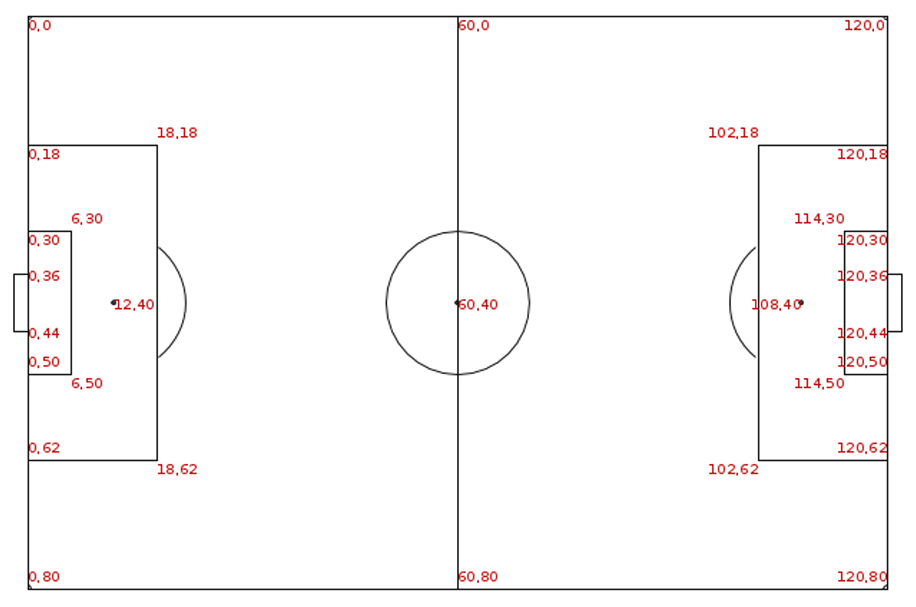

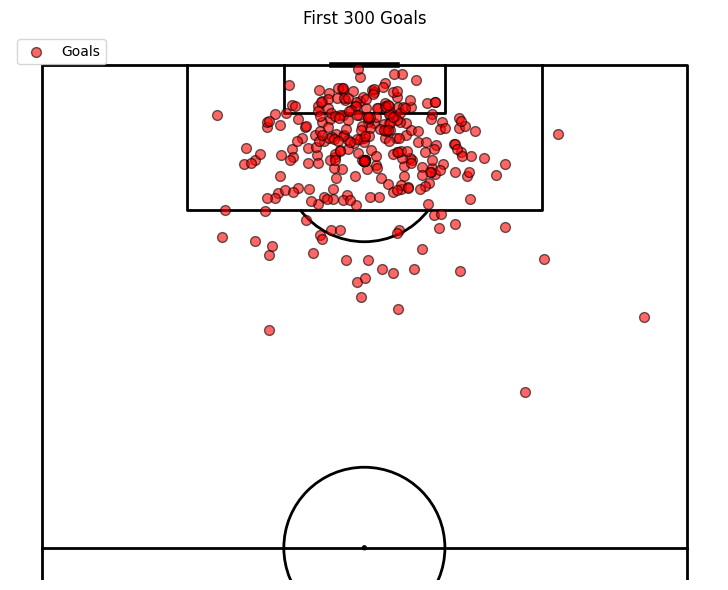

In [47]:
#All shots are mapped onto one goal in the Statsbomb data, allowing visualization using just half the pitch.

first_300_goals = shots_master_df[shots_master_df['outcome_name'] == 'Goal'].iloc[:300]

pitch = VerticalPitch(pitch_type='statsbomb', line_color='black', half = True)
fig, ax = pitch.draw(figsize=(10, 6))

pitch.scatter(first_300_goals['x'], first_300_goals['y'], ax=ax, color='red', edgecolors='black',alpha = 0.6, s=50, label='Goals')

plt.title('First 300 Goals')
plt.legend(loc = 'upper left')
plt.show()

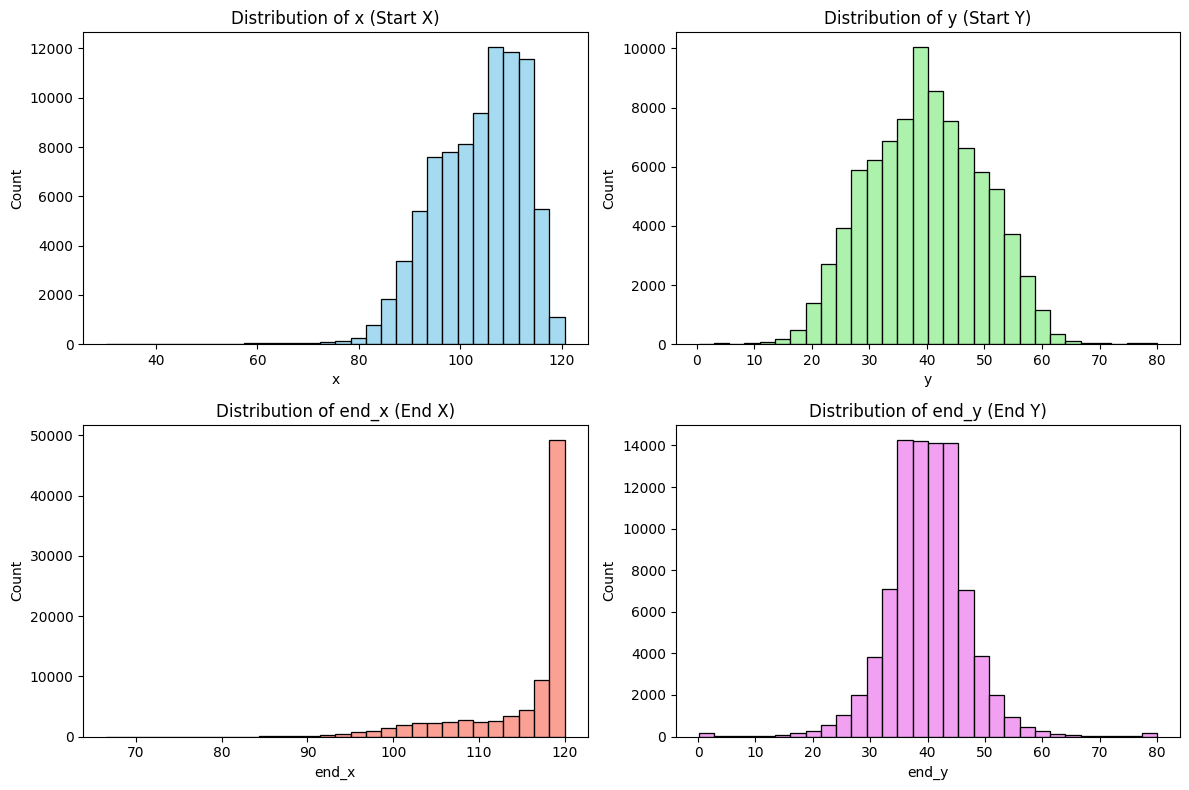

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(shots_master_df['x'], bins=30, kde=False, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Distribution of x (Start X)')

sns.histplot(shots_master_df['y'], bins=30, kde=False, ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Distribution of y (Start Y)')

sns.histplot(shots_master_df['end_x'], bins=30, kde=False, ax=axs[1, 0], color='salmon')
axs[1, 0].set_title('Distribution of end_x (End X)')

sns.histplot(shots_master_df['end_y'], bins=30, kde=False, ax=axs[1, 1], color='violet')
axs[1, 1].set_title('Distribution of end_y (End Y)')

plt.tight_layout()
plt.show()


In [84]:
#We can see that the shots are directed towards the goal with the center located at x = 120, y = 40. Strong outliers are considered very bad attempts.
#IMPORTANT: Statbomb uses the coordinates to standardize their measurements across pitches of different sizes. This is useful for modeling and plotting, especially for visual consistency across competitions and leagues.
#Therefore, the distance to goal is not calculated in meters but in pitch units. It can be calculated using Eukledian Distance.

GOAL_CENTER_X = 120
GOAL_CENTER_Y = 40

shots_master_df['distance_to_goal'] = np.sqrt(
    (GOAL_CENTER_X - shots_master_df['x'])**2 +
    (GOAL_CENTER_Y - shots_master_df['y'])**2
)

shots_master_df[['id','period', 'timestamp', 'team_id', 'team_name', 'player_id', 'player_name', 'x', 'y', 'distance_to_goal', 'match_id', 'outcome_name']].head()

,id,period,timestamp,team_id,team_name,player_id,player_name,x,y,distance_to_goal,match_id,outcome_name
0,c577e730-b9f5-44f2-9257-9e7730c23d7b,1,00:06:48.773000,176,Werder Bremen,8826.0,Leonardo Bittencourt,100.4,35.1,20.203218,3895302,Blocked
1,bbc2c68d-c096-483d-abf4-32c0175a0f55,1,00:07:40.953000,904,Bayer Leverkusen,38004.0,Piero Martín Hincapié Reyna,114.6,33.5,8.450444,3895302,Saved
2,12b5206b-9ed0-4b1e-9ec3-f2028187e09f,1,00:11:08.471000,176,Werder Bremen,51769.0,Julián Malatini,106.2,55.8,20.978084,3895302,Blocked
3,b2c3d59d-3bef-4f8a-ad86-26b69940c64e,1,00:13:16.073000,904,Bayer Leverkusen,8221.0,Jonathan Tah,113.9,47.4,9.590099,3895302,Blocked
4,bb53b537-1685-4019-9e8f-98f3805828eb,1,00:16:00.956000,904,Bayer Leverkusen,3500.0,Granit Xhaka,89.2,42.5,30.901294,3895302,Blocked


In [85]:
#TO DO: Plot distance to goal scatter plot

In [115]:
#Now I want to visualy show an example how distance to goal works. Let's look at a random match of Spain's women in the 2023 World Cup
parser = Sbopen()
matches_df = parser.match(competition_id=72, season_id=107)
matches_df = matches_df[(matches_df["home_team_name"] == "Spain Women's")|(matches_df["away_team_name"] == "Spain Women's")]
print(matches_df['match_id'].unique())

dis_to_goal_df = shots_master_df[['id','period', 'timestamp', 'team_id', 'team_name', 'player_id', 'player_name', 'x', 'y', 'distance_to_goal', 'match_id', 'outcome_name']]

goals_df = dis_to_goal_df[
    (dis_to_goal_df['match_id'] == 3902240) &
    (dis_to_goal_df['outcome_name'] == 'Goal')
]

goals_df.head()

[3906390 3904628 3893806 3893822 3902240 3901733 3893791]


,id,period,timestamp,team_id,team_name,player_id,player_name,x,y,distance_to_goal,match_id,outcome_name
84554,7c9b6e01-2124-4135-9fb7-81350a3b474e,2,00:35:16.785000,863,Spain Women's,10161.0,María Francesca Caldentey Oliver,108.1,40.1,11.900420,3902240,Goal
84560,723925a1-dbde-4898-a8be-bbabe9588e56,2,00:45:50.961000,851,Netherlands Women's,10647.0,Stephanie van der Gragt,102.8,50.4,20.099751,3902240,Goal
84571,4e9448ed-25c8-4538-a023-8829ec229c42,4,00:05:36.645000,863,Spain Women's,222682.0,Salma Paralluelo Ayingono,106.4,30.3,16.704790,3902240,Goal


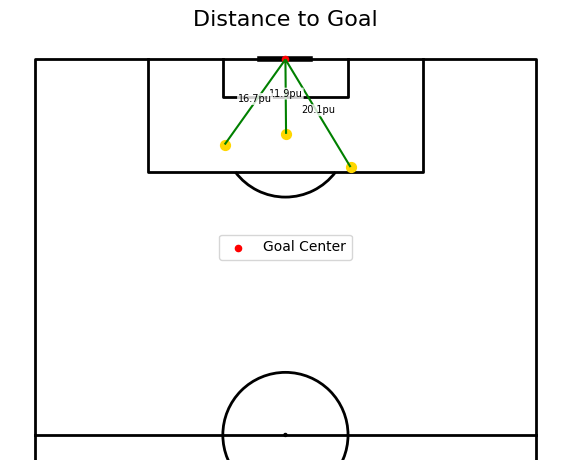

In [119]:
GOAL_CENTER_X = 120
GOAL_CENTER_Y = 40


pitch = VerticalPitch(pitch_type='statsbomb', line_color='black', half = True)
fig, ax = pitch.draw(
    #figsize=(6, 10)
)

pitch.scatter(GOAL_CENTER_X, GOAL_CENTER_Y, s=20, c='red', ax=ax, label='Goal Center')

for _, row in goals_df.iterrows():
    shot_x = row['x']
    shot_y = row['y']
    distance = row['distance_to_goal']

    pitch.scatter(shot_x, shot_y, ax=ax, c='gold', s=50)

    pitch.lines(shot_x, shot_y, GOAL_CENTER_X, GOAL_CENTER_Y, ax=ax, color='green', lw=1.5)

    mid_x = (shot_x + GOAL_CENTER_X) / 2
    mid_y = (shot_y + GOAL_CENTER_Y) / 2
    pitch.annotate(
      f"{distance:.1f}pu",
      xy=(mid_x, mid_y),
      ax=ax,
      fontsize=7,
      ha='center',
      color='black',
      bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round', pad=0.1)
    )

ax.set_title('Distance to Goal', fontsize=16)
ax.legend()
plt.show()

#One goal was a penalty. Because the coordinate system penalty spot is at 108,40 and the center of the goal is at 120,40 distance_to_goal is 12.

In [121]:
#The next feature to consider is the angle to the goal. For that the goalposts need to be considered.

#Goalposts y-coordinates
goal_y1 = 36  #left post
goal_y2 = 44  #right post
GOAL_WIDTH = 8

#Shot coordinates
x = shots_master_df['x'].to_numpy()
y = shots_master_df['y'].to_numpy()

#Distances from shot to left and right goalposts
a = np.sqrt((GOAL_CENTER_X - x)**2 + (goal_y1 - y)**2)
b = np.sqrt((GOAL_CENTER_X - x)**2 + (goal_y2 - y)**2)
c = GOAL_WIDTH

#Avoid division by zero
denominator = 2 * a * b
cos_angle = (a**2 + b**2 - c**2) / denominator
cos_angle = np.clip(cos_angle, -1.0, 1.0)  # Ensure within valid arccos range

#Calculate angle in radians
angle_radians = np.arccos(cos_angle)

shots_master_df['angle_to_goal'] = angle_radians
shots_master_df['angle_to_goal_deg'] = np.degrees(angle_radians)

In [129]:
angle_to_goal_df = shots_master_df[['id','period', 'timestamp', 'team_id', 'team_name', 'player_id', 'player_name', 'x', 'y', 'angle_to_goal','angle_to_goal_deg', 'match_id', 'outcome_name']]

goal_angles_df = angle_to_goal_df[
    (angle_to_goal_df['match_id'] == 3902240) &
    (angle_to_goal_df['outcome_name'] == 'Goal')
]

goal_angles_df.head()

,id,period,timestamp,team_id,team_name,player_id,player_name,x,y,angle_to_goal,angle_to_goal_deg,match_id,outcome_name
84554,7c9b6e01-2124-4135-9fb7-81350a3b474e,2,00:35:16.785000,863,Spain Women's,10161.0,María Francesca Caldentey Oliver,108.1,40.1,0.648501,37.156345,3902240,Goal
84560,723925a1-dbde-4898-a8be-bbabe9588e56,2,00:45:50.961000,851,Netherlands Women's,10647.0,Stephanie van der Gragt,102.8,50.4,0.340802,19.526500,3902240,Goal
84571,4e9448ed-25c8-4538-a023-8829ec229c42,4,00:05:36.645000,863,Spain Women's,222682.0,Salma Paralluelo Ayingono,106.4,30.3,0.392183,22.470456,3902240,Goal


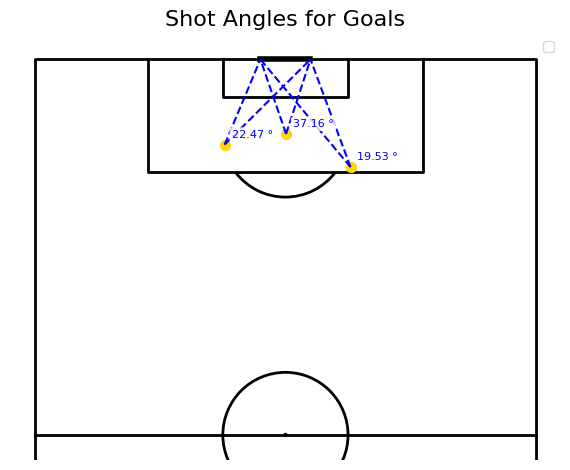

In [133]:
goal_x, goal_y = 120, 40
left_post_y = 36
right_post_y = 44
goal_width = 8

pitch = VerticalPitch(pitch_type='statsbomb', line_color='black', half=True)
fig, ax = pitch.draw()

for i, row in goal_angles_df.iterrows():
    shot_x = row['x']
    shot_y = row['y']
    angle = row['angle_to_goal_deg']

    pitch.scatter(shot_x, shot_y, ax=ax, c='gold', s=50, label='Goal' if i == 0 else None)

    pitch.lines(shot_x, shot_y, goal_x, left_post_y, ax=ax, color='blue', lw=1.5, linestyle='--')
    pitch.lines(shot_x, shot_y, goal_x, right_post_y, ax=ax, color='blue', lw=1.5, linestyle='--')

    pitch.annotate(
        f"{angle:.2f} °",
        xy=(shot_x, shot_y),
        ax=ax,
        fontsize=8,
        ha='left',
        color='blue',
        xytext=(5, 5),
        textcoords='offset points',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round' ,pad=0.2)
    )

ax.set_title('Shot Angles for Goals', fontsize=16)
ax.legend()
plt.show()

#For the penalty, if placed perfectly at 108, 40 the angle would be ~36.9°.
#However, this specific penalty is placed at 108.1, 40.1 which equals an angle of 37.2°

Recovered work

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

In [ ]:
X = shots_master_women_world_cup_df[['angle_to_goal_deg', 'distance_to_goal', 'x', 'y']]


    #'body_part_id',
    #'body_part_name',
    #'shot_key_pass_id',
    #'x',
    #'y',
    #'end_x',
    #'end_y',
    #'end_z',
    #'aerial_won',
    #'shot_first_time',
    #'shot_statsbomb_xg',
    #'block_deflection',
    #'technique_id',
    #'technique_name',
    #'body_part_id',
    #'body_part_name',
    #'sub_type_id',
    #'sub_type_name',

y = shots_master_women_world_cup_df['goal']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # probabilities

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probability of class = 1 (goal)
y_probs = model.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import statsmodels.api as sm

# Define your features and target
X = shots_master_women_world_cup_df[['angle_to_goal', 'distance_to_goal']]
y = shots_master_women_world_cup_df['goal']

# Add intercept
X_with_const = sm.add_constant(X)

# Fit logistic regression
model = sm.Logit(y, X_with_const)
result = model.fit()

# Calculate McFadden's R²
ll_model = result.llf               # Log-likelihood of fitted model
ll_null = result.llnull             # Log-likelihood of null model

mcfadden_r2 = 1 - (ll_model / ll_null)
print(f"McFadden's R²: {mcfadden_r2:.4f}")